In [2]:
# Use only the provided packages!
import math
import csv
from util import *
from collections import Counter 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
######################################################################
# classes
######################################################################

class Classifier(object) :
    """
    Classifier interface.
    """
    
    def fit(self, X, y):
        raise NotImplementedError()
        
    def predict(self, X):
        raise NotImplementedError()


class MajorityVoteClassifier(Classifier) :
    
    def __init__(self) :
        """
        A classifier that always predicts the majority class.
        
        Attributes
        --------------------
            prediction_ -- majority class
        """
        self.prediction_ = None
    
    def fit(self, X, y) :
        """
        Build a majority vote classifier from the training set (X, y).
        
        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes
        
        Returns
        --------------------
            self -- an instance of self
        """
        majority_val = Counter(y).most_common(1)[0][0]
        self.prediction_ = majority_val
        return self
    
    def predict(self, X) :
        """
        Predict class values.
        
        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
        
        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.prediction_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")
        
        n,d = X.shape
        y = [self.prediction_] * n 
        return y


In [4]:
class RandomClassifier(Classifier) :
    
    def __init__(self) :
        """
        A classifier that predicts according to the distribution of the classes.
        
        Attributes
        --------------------
            probabilities_ -- class distribution dict (key = class, val = probability of class)
        """
        self.probabilities_ = None
    
    def fit(self, X, y) :
        """
        Build a random classifier from the training set (X, y).
        
        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            y    -- numpy array of shape (n,), target classes
        
        Returns
        --------------------
            self -- an instance of self
        """
        
        ### ========== TODO : START ========== ###
        # part b: set self.probabilities_ according to the training set
        #set self probabilities to a dict so we can store probabilities from counter
        self.probabilities_ = dict()
        c = Counter(y) # assign counter
        tot = sum(Counter(y).values()) # probability for distributon calc
        for i in c:
            self.probabilities_[i] = c[i]/tot
            
        
        ### ========== TODO : END ========== ###
        
        return self
    
    def predict(self, X, seed=1234) :
        """
        Predict class values.
        
        Parameters
        --------------------
            X    -- numpy array of shape (n,d), samples
            seed -- integer, random seed
        
        Returns
        --------------------
            y    -- numpy array of shape (n,), predicted classes
        """
        if self.probabilities_ is None :
            raise Exception("Classifier not initialized. Perform a fit first.")
        np.random.seed(seed)
        
        ### ========== TODO : START ========== ###
        # part b: predict the class for each test example
        # hint: use np.random.choice (be careful of the parameters)
        y = np.random.choice(list(self.probabilities_.keys()),X.shape[0],p=list(self.probabilities_.values()))        


        
        ### ========== TODO : END ========== ###
        
        return y


In [5]:
######################################################################
# functions
######################################################################
def plot_histograms(X, y, Xnames, yname) :
    n,d = X.shape  # n = number of examples, d =  number of features
    fig = plt.figure(figsize=(20,15))
    nrow = 3; ncol = 3
    for i in range(d) :
        fig.add_subplot (3,3,i)  
        data, bins, align, labels = plot_histogram(X[:,i], y, Xname=Xnames[i], yname=yname, show = False)
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xnames[i])
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')
 
    plt.savefig ('histograms.pdf')


def plot_histogram(X, y, Xname, yname, show = True) :
    """
    Plots histogram of values in X grouped by y.
    
    Parameters
    --------------------
        X     -- numpy array of shape (n,d), feature values
        y     -- numpy array of shape (n,), target classes
        Xname -- string, name of feature
        yname -- string, name of target
    """
    
    # set up data for plotting
    targets = sorted(set(y))
    data = []; labels = []
    for target in targets :
        features = [X[i] for i in range(len(y)) if y[i] == target]
        data.append(features)
        labels.append('%s = %s' % (yname, target))
    
    # set up histogram bins
    features = set(X)
    nfeatures = len(features)
    test_range = range(int(math.floor(min(features))), int(math.ceil(max(features)))+1)
    if nfeatures < 10 and sorted(features) == test_range:
        bins = test_range + [test_range[-1] + 1] # add last bin
        align = 'left'
    else :
        bins = 10
        align = 'mid'
    
    # plot
    if show == True:
        plt.figure()
        n, bins, patches = plt.hist(data, bins=bins, align=align, alpha=0.5, label=labels)
        plt.xlabel(Xname)
        plt.ylabel('Frequency')
        plt.legend() #plt.legend(loc='upper left')
        plt.show()

    return data, bins, align, labels


def error(clf, X, y, ntrials=100, test_size=0.2) :
    """
    Computes the classifier error over a random split of the data,
    averaged over ntrials runs.
    
    Parameters
    --------------------
        clf         -- classifier
        X           -- numpy array of shape (n,d), features values
        y           -- numpy array of shape (n,), target classes
        ntrials     -- integer, number of trials
    
    Returns
    --------------------
        train_error -- float, training error
        test_error  -- float, test error
    """
    
    ### ========== TODO : START ========== ###
    # compute cross-validation error over ntrials
    # hint: use train_test_split (be careful of the parameters)
    train_error=0
    test_error=0
    for trial in range(ntrials):
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state = trial)
        clf.fit(X_train, Y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        train_error += (1 - metrics.accuracy_score(Y_train, y_pred_train, normalize=True))
        test_error +=  (1 - metrics.accuracy_score(Y_test, y_pred_test, normalize=True))
        
    train_error = train_error/ntrials
    test_error = test_error/ntrials
        
    ### ========== TODO : END ========== ###
    
    return train_error, test_error


def write_predictions(y_pred, filename, yname=None) :
    """Write out predictions to csv file."""
    out = open(filename, 'wb')
    f = csv.writer(out)
    if yname :
        f.writerow([yname])
    f.writerows(zip(y_pred))
    out.close()



Classifying using Majority Vote...
	-- training error: 0.404
Classifying using Random...
	-- training error: 0.485
Classifying using Decision Tree...
	--training error 0.014
Investigating various classifiers...
Majority Vote Error:
	-- training error: 0.404
	-- testing error: 0.407
Random Vote Error:
	-- training error: 0.486
	-- testing error: 0.478
DecisionTreeClassifier Error:
	-- training error: 0.012
	-- testing error: 0.241
Investigating depths...
Investigating training set sizes...
Done


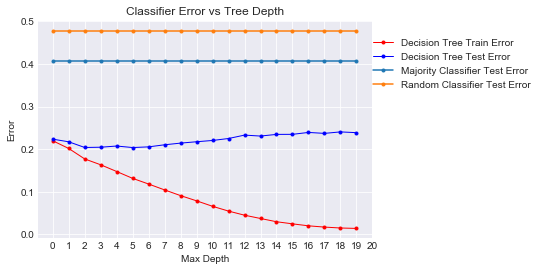

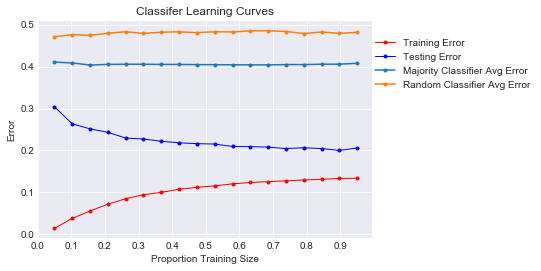

In [14]:
def main():
    # load Titanic dataset
    titanic = load_data("titanic_train.csv", header=1, predict_col=0)
    X = titanic.X; Xnames = titanic.Xnames
    y = titanic.y; yname = titanic.yname
    n,d = X.shape  # n = number of examples, d =  number of features
    
    
    
    #========================================
    # part a: plot histograms of each feature
   # print ('Plotting...')
    #for i in range(d) :
     #   plot_histogram(X[:,i], y, Xname=Xnames[i], yname=yname)

       
    #========================================
    # train Majority Vote classifier on data
    print ('Classifying using Majority Vote...')
    clf = MajorityVoteClassifier() # create MajorityVote classifier, which includes all model parameters
    clf.fit(X, y)                  # fit training data using the classifier
    y_pred = clf.predict(X)        # take the classifier and run it on the training data
    train_error = 1 - metrics.accuracy_score(y, y_pred, normalize=True)
    print (('\t-- training error: %.3f') % (train_error))
    
    
    
    ### ========== TODO : START ========== ###
    # part b: evaluate training error of Random classifier
    print ('Classifying using Random...')
    clf_2 = RandomClassifier() #create random classifier 
    clf_2.fit(X,y)
    y_pred_2 = clf_2.predict(X)
    train_error_2 = 1 - metrics.accuracy_score(y, y_pred_2, normalize=True)
    print (('\t-- training error: %.3f') % (train_error_2))
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # part c: evaluate training error of Decision Tree classifier
    # use criterion of "entropy" for Information gain 
    print ('Classifying using Decision Tree...')
    dt = DecisionTreeClassifier('entropy')
    dt.fit(X,y)
    y_pred_3 = dt.predict(X)
    train_error_3 = 1- metrics.accuracy_score(y, y_pred_3, normalize=True)
    print((('\t--training error %.3f'))% (train_error_3))
    ### ========== TODO : END ========== ###
    
    
    
    # note: uncomment out the following lines to output the Decision Tree graph
    """
    # save the classifier -- requires GraphViz and pydot
    import StringIO, pydot
    from sklearn import tree
    dot_data = StringIO.StringIO()
    tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=Xnames)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    graph.write_pdf("dtree.pdf") 
    """
    
    
    
    ### ========== TODO : START ========== ###
    # part d: use cross-validation to compute average training and test error of classifiers
    print ('Investigating various classifiers...')
    MVtrain_e, MVtest_e = error(MajorityVoteClassifier(),X,y)
    print('Majority Vote Error:')
    print('\t-- training error: %.3f' %  MVtrain_e)
    print('\t-- testing error: %.3f' % MVtest_e)
    
    RCtrain_e, RCtest_e = error(RandomClassifier(),X,y)
    print('Random Vote Error:')
    print('\t-- training error: %.3f' %  RCtrain_e)
    print('\t-- testing error: %.3f' % RCtest_e)
    
    DTtrain_e, DTtest_e = error(DecisionTreeClassifier("entropy"),X,y)
    print('DecisionTreeClassifier Error:')
    print('\t-- training error: %.3f' %  DTtrain_e)
    print('\t-- testing error: %.3f' % DTtest_e)
    ### ========== TODO : END ========== ###
    
    
    
    
    ### ========== TODO : START ========== ###
    # part e: investigate decision tree classifier with various depths
    
    print ('Investigating depths...')
    hold_train =[]
    hold_test =[]
    mv_hold = []
    dt_hold = []
    rc_hold =[]
    for i in range(1,21):
        train_error, test_error = error(DecisionTreeClassifier("entropy", max_depth=i), X,y)
       # print('For'+ str(i))
       # print('\t-- training error: %.3f' %  train_error)
       # print('\t-- testing error: %.3f' % test_error)
        hold_train.append(train_error)
        hold_test.append(test_error)
    plt.figure(1)  
    plt.style.use('seaborn-darkgrid')

    line1=plt.plot(hold_train, c = "red", marker=".", linestyle="-", label = "Decision Tree Train Error", linewidth=1)
   # plt.style.use('seaborn-darkgrid')
    line2 =plt.plot(hold_test, c = "blue",marker=".", linestyle="-", label = "Decision Tree Test Error",linewidth =1)
    for i in range(1,21):
        mv_hold.append(MVtest_e)
        dt_hold.append(DTtest_e)
        rc_hold.append(RCtest_e)

    plt.plot(mv_hold,label = "Majority Classifier Test Error", marker=".")
    #plt.plot(dt_hold, label = "DT Base Testing Error", marker=".")
    plt.plot(rc_hold,label = "Random Classifier Test Error", marker=".")
    plt.title("Classifier Error vs Tree Depth")
    plt.xlabel("Max Depth")
    plt.ylabel("Error")
    plt.xticks(np.arange(0,21, step=1))
    plt.legend(loc='right',
          ncol=1, fancybox=True, shadow=True,bbox_to_anchor=(1.5, 0.8))   
    
   
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # part f: investigate decision tree classifier with various training set sizes
    print ('Investigating training set sizes...')
    set_size_test =[]
    set_size_train =[]
    mv_holdavg = []
    
    rc_holdavg =[]    
    i = 0.95
    while i >= 0.05 :
        Ttrain_error, Ttest_error = error(DecisionTreeClassifier("entropy", max_depth= 6), X, y, test_size=i)
        Rtrain_error, Rtest_error = error(RandomClassifier(), X, y, test_size=i)
        Mtrain_error, Mtest_error = error(MajorityVoteClassifier(), X, y, test_size=i)

        #print(i,train_error)
        mv_holdavg.append((Mtrain_error+Mtest_error)/2)
        rc_holdavg.append((Rtrain_error+Rtest_error)/2)
        set_size_train.append(Ttrain_error)
        set_size_test.append(Ttest_error)
        i=i-0.05
    
   
    x1=np.linspace(0.05,0.95, 18)
   
    ### ========== TODO : END ========== ###
    plt.figure(2)        
    plt.style.use('seaborn-darkgrid')
    plt.plot(x1,set_size_train, c = "red", marker=".", linestyle="-", label = "Training Error", linewidth=1)
    plt.plot(x1,set_size_test, c="blue", marker=".", linestyle="-", label = "Testing Error", linewidth=1)
    plt.plot(x1, mv_holdavg,label = "Majority Classifier Avg Error", marker=".")
    #plt.plot(x1,dt_hold, label = "DT Base Testing Error", marker=".")
    plt.plot(x1,rc_holdavg,label = "Random Classifier Avg Error", marker=".")
    plt.title("Classifer Learning Curves")
    plt.xlabel("Proportion Training Size")
    plt.ylabel("Error")
    plt.legend(loc='right',
          ncol=1, fancybox=True, shadow=True,bbox_to_anchor=(1.5, 0.8))   
    plt.xticks(np.arange(0,1, step=0.1))

    print ('Done')


if __name__ == "__main__":
    main()
